# Random numbers generation

## Linear congruential generators

Adapted from https://rosettacode.org/wiki/Linear_congruential_generator

In [33]:
function getlcg(seed::Integer, a::Integer, c::Integer, m::Integer)
    state = seed
    am_mil = 1.0/m
    return function lcgrand()
        state = mod(a * state + c, m)
        return state*am_mil  # produce a number in (0,1)
    end
end

getlcg (generic function with 1 method)

In [34]:
stdmin = getlcg(1234, 16807, 0, 2^31-1)

(::var"#lcgrand#1"{Int64, Int64, Int64, Float64}) (generic function with 1 method)

In [35]:
n = 10000

sample = zeros(n)

for i = 1:n
    sample[i] = stdmin()
end

In [36]:
using Plots

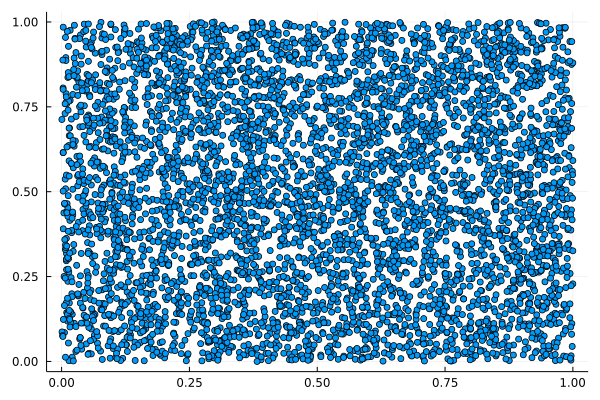

In [37]:
scatter(sample[[2*i+1 for i = 0:(Int)(n/2)-1]], sample[[2*i for i = 1:(Int)(n/2)]], label="", fmt = :png)

## RDST

In [ ]:
import Pkg

Pkg.add(url = "https://github.com/JLChartrand/RDST.jl")

In [38]:
using RDST

See test notebook in RDST.

## Nonuniform distributions

For continuous random variables, the inversion technique is equivalent to compute the quantile associated to the realization of a uniform random variable $U(0,1)$. We will use the distributions package.

In [39]:
using Distributions

In [40]:
N = Normal()
α = quantile(N, 0.975)

1.9599639845400576

Normally distributed number generation:

In [42]:
quantile(N, rand())

-0.6293446835790214

We can measure the required generation time with the package BenchmarkTools.

In [43]:
using BenchmarkTools

In [44]:
function InvertNormal()
    U = rand(Float64, 2)
    return quantile(N, U[1]), quantile(N, U[2])
end

InvertNormal (generic function with 1 method)

In [45]:
@btime X, Y = InvertNormal()

  186.082 ns (6 allocations: 192 bytes)


(0.300668577021786, -0.2025472841900481)

In [46]:
function BoxMuller()
    U = rand(Float64, 2)
    
    R = sqrt(-2*log(U[1]))
    θ = 2*π*U[2]
    
    X = R*cos(θ)
    Y = R*sin(θ)
    
    return X, Y
end

BoxMuller (generic function with 1 method)

In [47]:
@btime X, Y = BoxMuller()

  89.562 ns (1 allocation: 96 bytes)


(-1.437745493981214, 0.02767332098935267)

In [48]:
randn()

1.4473525483543168

In [49]:
@btime randn()

  8.408 ns (0 allocations: 0 bytes)


-1.4057443009300974